<a href="https://colab.research.google.com/github/MFerrugem/RNA/blob/main/MLP_02_BOOK_UFPEL_Concisa_sem_D2L.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Passos para criar um perceptron usando TensorFlow:**
*   Importar as bibliotecas necessárias
*   Carregar e preparar o dataset
*   Definir e compilar o modelo do perceptron
*   Treinar o modelo
*   Avaliar o modelo

Importando as bibliotecas e carregando o dataset: Importamos o TensorFlow para criar o modelo e funções do scikit-learn para manipular o dataset e realizar a padronização.

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Criar o modelo de rede neural
net = Sequential()
# Usando Flatten para transformar a saída das camadas convolucionais em um vetor
net.add(Flatten())
net.add(Dense(256, activation='relu'))
net.add(Dense(10, activation='softmax'))

In [3]:
# Resumo do modelo
net.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Carregar o dataset fashion_mnist
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# Normalizar os dados para o intervalo [0, 1]
X_train, X_test = X_train / 255.0, X_test / 255.0

In [7]:
# Compilar o modelo
net.compile(tf.keras.optimizers.SGD(learning_rate=0.1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Treinar o modelo
history = net.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7659 - loss: 0.6662 - val_accuracy: 0.8378 - val_loss: 0.4484
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8547 - loss: 0.4031 - val_accuracy: 0.8531 - val_loss: 0.4046
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8701 - loss: 0.3587 - val_accuracy: 0.8536 - val_loss: 0.3909
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8783 - loss: 0.3310 - val_accuracy: 0.8668 - val_loss: 0.3669
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8865 - loss: 0.3101 - val_accuracy: 0.8702 - val_loss: 0.3483
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8909 - loss: 0.2960 - val_accuracy: 0.8625 - val_loss: 0.3746
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8937 - loss: 0.2853 - val_accuracy: 0.8677 - val_loss: 0.3666
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8995 - loss: 0.2746 -

In [9]:
# Avaliar o modelo
test_loss, test_acc = net.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8762 - loss: 0.3575
Test accuracy: 0.8755


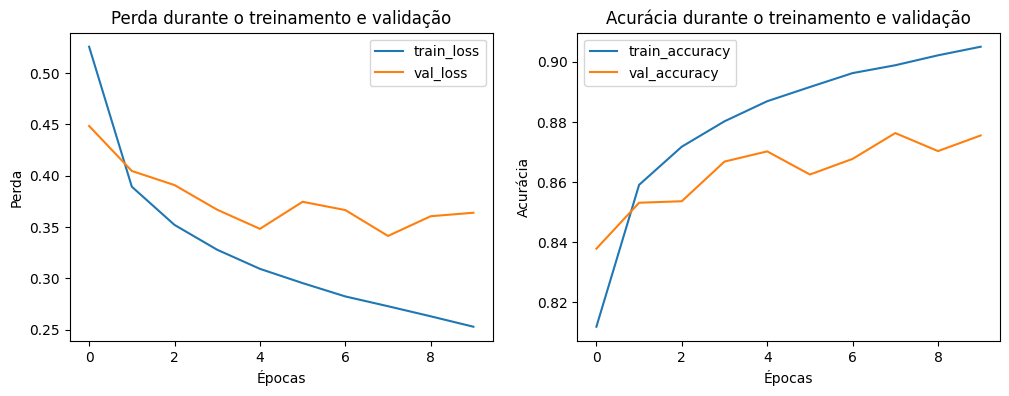

In [10]:
# Plotar as curvas de perda e acurácia
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Perda durante o treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Acurácia durante o treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.show()

In [11]:
# Salvar o modelo treinado
net.save("meu_fashion_mnist_cnn_model_sgd.keras")

Exercícios
¶
1) Altere o valor do hiperparâmetro num_hiddens e veja como esse hiperparâmetro influencia seus resultados. Determine o melhor valor deste hiperparâmetro, mantendo todos os outros constantes.

2) Experimente adicionar uma camada oculta adicional para ver como isso afeta os resultados.

3) Como mudar a taxa de aprendizado altera seus resultados? Corrigindo a arquitetura do modelo e outros hiperparâmetros (incluindo o número de épocas), qual taxa de aprendizado oferece os melhores resultados?

4) Qual é o melhor resultado que você pode obter otimizando todos os hiperparâmetros (taxa de aprendizagem, número de épocas, número de camadas ocultas, número de unidades ocultas por camada) em conjunto?

5) Descreva por que é muito mais difícil lidar com vários hiperparâmetros.

6) Qual é a estratégia mais inteligente que você pode imaginar para estruturar uma pesquisa em vários hiperparâmetros?